In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_drop_id = df.drop(['PassengerId'], axis=1)
df_drop_id.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_drop_id['Survived'].unique()

array([0, 1])

In [7]:
df_drop_cabin = df_drop_id.drop(['Cabin'], axis=1)
df_drop_cabin.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
df_drop_cabin['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df_fill_embarked = df_drop_cabin
df_fill_embarked['Embarked'] = df_drop_cabin['Embarked'].fillna('S')
df_fill_embarked.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
df_fill_embarked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


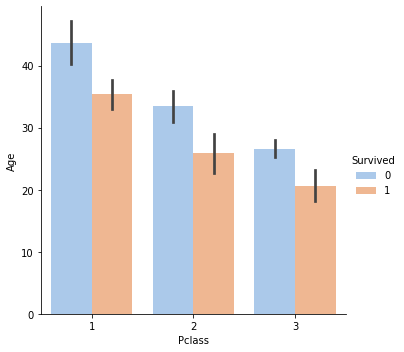

In [11]:
g = sns.catplot("Pclass", "Age", "Survived", data=df_fill_embarked, kind="bar", palette="pastel")
plt.show()

In [12]:
df_age_null = df_fill_embarked[df_fill_embarked['Age'].isnull() == True]
df_age_not_null = df_fill_embarked[df_fill_embarked['Age'].isnull() == False]

In [13]:
df_age_null.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [14]:
df_age_not_null.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
df_age_not_null_grouped = df_age_not_null.groupby(['Pclass', 'Sex'])
df_age_not_null_grouped.first()

Survived                                               Name  \
Pclass Sex                                                                   
1      female         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
       male           0                            McCarthy, Mr. Timothy J   
2      female         1                Nasser, Mrs. Nicholas (Adele Achem)   
       male           0                               Fynney, Mr. Joseph J   
3      female         1                             Heikkinen, Miss. Laina   
       male           0                            Braund, Mr. Owen Harris   

                Age  SibSp  Parch            Ticket     Fare Embarked  
Pclass Sex                                                             
1      female  38.0      1      0          PC 17599  71.2833        C  
       male    54.0      0      0             17463  51.8625        S  
2      female  14.0      1      0            237736  30.0708        C  
       male    35.0      0      0            239865  26.0000        S  
3      female  26.0      0      0  STON/O2. 3101282   7.9250        S  
       male    22.0      1      0         A/5 21171   7.2500        S

In [16]:
age_mean = df_age_not_null_grouped['Age'].mean().to_dict()
age_mean

{(1, 'female'): 34.61176470588235,
 (1, 'male'): 41.28138613861386,
 (2, 'female'): 28.722972972972972,
 (2, 'male'): 30.74070707070707,
 (3, 'female'): 21.75,
 (3, 'male'): 26.507588932806325}

In [17]:
df_age_null.loc[::, 'Age'] = df_age_null.apply(lambda x: age_mean[(x['Pclass'], x['Sex'])], axis=1)
df_age_null.tail(10)

/home/vccolombo/Programing/titanic/.venv/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
832,0,3,"Saad, Mr. Amin",male,26.507589,0,0,2671,7.2292,C
837,0,3,"Sirota, Mr. Maurice",male,26.507589,0,0,392092,8.0500,S
839,1,1,"Marechal, Mr. Pierre",male,41.281386,0,0,11774,29.7000,C
846,0,3,"Sage, Mr. Douglas Bullen",male,26.507589,8,2,CA. 2343,69.5500,S
849,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,34.611765,1,0,17453,89.1042,C
859,0,3,"Razi, Mr. Raihed",male,26.507589,0,0,2629,7.2292,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,21.750000,8,2,CA. 2343,69.5500,S
868,0,3,"van Melkebeke, Mr. Philemon",male,26.507589,0,0,345777,9.5000,S
878,0,3,"Laleff, Mr. Kristo",male,26.507589,0,0,349217,7.8958,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.750000,1,2,W./C. 6607,23.4500,S


In [18]:
df_age_concat = pd.concat([df_age_null, df_age_not_null])
df_age_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 5 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [19]:
df_age_concat.Sex.unique()

array(['male', 'female'], dtype=object)

In [20]:
df_sex = df_age_concat
df_sex.Sex = df_age_concat.Sex.apply(lambda x: 1 if x == 'male' else 0)
df_sex.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",1,26.507589,0,0,330877,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",1,30.740707,0,0,244373,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",0,21.750000,0,0,2649,7.2250,C
26,0,3,"Emir, Mr. Farred Chehab",1,26.507589,0,0,2631,7.2250,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,21.750000,0,0,330959,7.8792,Q


In [21]:
df_sex.Name.unique()

array(['Moran, Mr. James', 'Williams, Mr. Charles Eugene',
       'Masselmani, Mrs. Fatima', 'Emir, Mr. Farred Chehab',
       'O\'Dwyer, Miss. Ellen "Nellie"', 'Todoroff, Mr. Lalio',
       'Spencer, Mrs. William Augustus (Marie Eugenie)',
       'Glynn, Miss. Mary Agatha', 'Mamee, Mr. Hanna',
       'Kraeff, Mr. Theodor', 'Rogers, Mr. William John',
       'Lennon, Mr. Denis', "O'Driscoll, Miss. Bridget",
       'Samaan, Mr. Youssef', 'Woolner, Mr. Hugh',
       'Stewart, Mr. Albert A', 'Moubarek, Master. Gerios',
       'Staneff, Mr. Ivan', 'Moutal, Mr. Rahamin Haim',
       'McDermott, Miss. Brigdet Delia', 'Slocovski, Mr. Selman Francis',
       'Shorney, Mr. Charles Joseph', 'Petroff, Mr. Pastcho ("Pentcho")',
       'Moss, Mr. Albert Johan', 'Moran, Miss. Bertha',
       'Moore, Mr. Leonard Charles', 'McMahon, Mr. Martin',
       'Peter, Miss. Anna', 'Boulos, Mrs. Joseph (Sultana)',
       'Olsen, Mr. Ole Martin', 'Smiljanic, Mr. Mile',
       'Sage, Master. Thomas Henry',
     

In [22]:
def get_title(name):
    for word in name.split():
        if '.' in word:
            return word

df_with_title = df_sex
df_with_title['Title'] = df_with_title['Name'].apply(get_title)
df_with_title['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Ms.            1
Capt.          1
Mme.           1
Sir.           1
Lady.          1
Jonkheer.      1
Countess.      1
Don.           1
Name: Title, dtype: int64

In [23]:
most_common_titles = ['Mr.', 'Miss.', 'Mrs.', 'Master.']
df_with_title['Title'] = df_with_title['Title'].apply(lambda x: x if x in most_common_titles else 'Other')
df_with_title['Title'].value_counts()

Mr.        517
Miss.      182
Mrs.       125
Master.     40
Other       27
Name: Title, dtype: int64

In [24]:
encoder_title = preprocessing.LabelEncoder()
title = encoder_title.fit_transform(df_with_title['Title'])
encoder_title.classes_

array(['Master.', 'Miss.', 'Mr.', 'Mrs.', 'Other'], dtype=object)

In [25]:
df_with_title['Title'] = title
df_with_title.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
5,0,3,"Moran, Mr. James",1,26.507589,0,0,330877,8.4583,Q,2
17,1,2,"Williams, Mr. Charles Eugene",1,30.740707,0,0,244373,13.0000,S,2
19,1,3,"Masselmani, Mrs. Fatima",0,21.750000,0,0,2649,7.2250,C,3
26,0,3,"Emir, Mr. Farred Chehab",1,26.507589,0,0,2631,7.2250,C,2
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,21.750000,0,0,330959,7.8792,Q,1


In [26]:
df_with_title['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
encoder_embarked = preprocessing.LabelEncoder()
embarked = encoder_embarked.fit_transform(df_with_title['Embarked'])
encoder_embarked.classes_

array(['C', 'Q', 'S'], dtype=object)

In [28]:
df_changed_embarked = df_with_title
df_changed_embarked['Embarked'] = embarked
df_changed_embarked.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
5,0,3,"Moran, Mr. James",1,26.507589,0,0,330877,8.4583,1,2
17,1,2,"Williams, Mr. Charles Eugene",1,30.740707,0,0,244373,13.0000,2,2
19,1,3,"Masselmani, Mrs. Fatima",0,21.750000,0,0,2649,7.2250,0,3
26,0,3,"Emir, Mr. Farred Chehab",1,26.507589,0,0,2631,7.2250,0,2
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,21.750000,0,0,330959,7.8792,1,1


In [29]:
df_changed_embarked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 5 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null int64
Title       891 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 83.5+ KB


In [30]:
df_droped = df_changed_embarked.drop(['Name', 'Ticket'], axis=1)
df_droped.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
5,0,3,1,26.507589,0,0,8.4583,1,2
17,1,2,1,30.740707,0,0,13.0000,2,2
19,1,3,0,21.750000,0,0,7.2250,0,3
26,0,3,1,26.507589,0,0,7.2250,0,2
28,1,3,0,21.750000,0,0,7.8792,1,1


In [31]:
df_droped.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
Survived,1.000000,-0.338481,-0.543351,-0.067485,-0.035322,0.081629,0.257307,-0.167675,-0.052471
Pclass,-0.338481,1.000000,0.131900,-0.407015,0.083081,0.018443,-0.549500,0.162098,-0.195910
Sex,-0.543351,0.131900,1.000000,0.112851,-0.114631,-0.245489,-0.182333,0.108262,0.040484
Age,-0.067485,-0.407015,0.112851,1.000000,-0.251313,-0.180705,0.118308,-0.011184,0.481038
SibSp,-0.035322,0.083081,-0.114631,-0.251313,1.000000,0.414838,0.159651,0.068230,-0.213887
Parch,0.081629,0.018443,-0.245489,-0.180705,0.414838,1.000000,0.216225,0.039798,-0.122792
Fare,0.257307,-0.549500,-0.182333,0.118308,0.159651,0.216225,1.000000,-0.224719,-0.009068
Embarked,-0.167675,0.162098,0.108262,-0.011184,0.068230,0.039798,-0.224719,1.000000,-0.011509
Title,-0.052471,-0.195910,0.040484,0.481038,-0.213887,-0.122792,-0.009068,-0.011509,1.000000


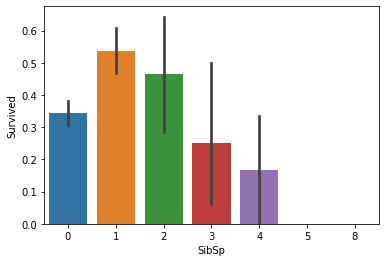

In [32]:
g = sns.barplot(x="SibSp", y="Survived", data=df_droped)
plt.show()

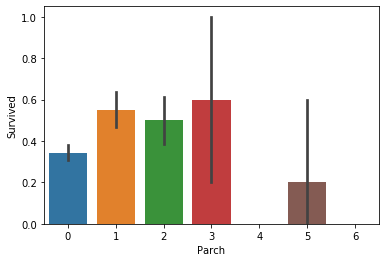

In [33]:
g = sns.barplot(x="Parch", y="Survived", data=df_droped)
plt.show()

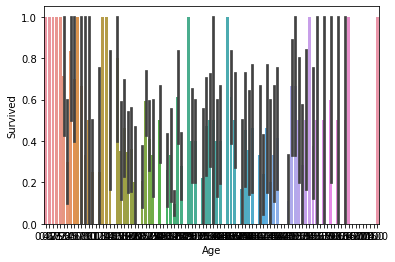

In [34]:
g = sns.barplot(x="Age", y="Survived", data=df_droped)
plt.show()

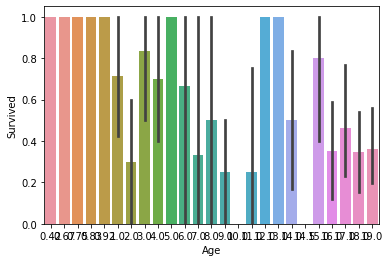

In [35]:
g = sns.barplot(x="Age", y="Survived", data=df_droped[df_droped['Age'] < 20])
plt.show()

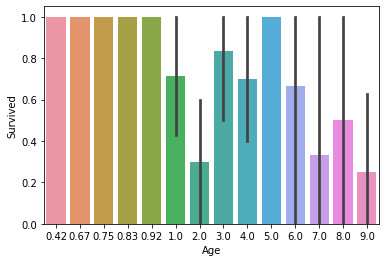

In [36]:
g = sns.barplot(x="Age", y="Survived", data=df_droped[df_droped['Age'] < 10])
plt.show()

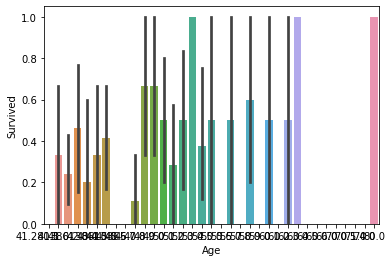

In [37]:
g = sns.barplot(x="Age", y="Survived", data=df_droped[df_droped['Age'] > 40])
plt.show()

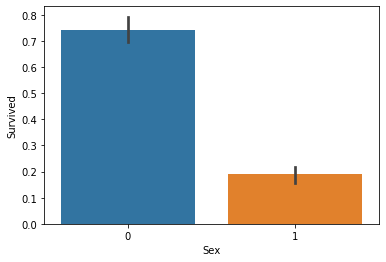

In [38]:
g = sns.barplot(x="Sex", y="Survived", data=df_droped)
plt.show()

In [39]:
def define_age_group(age):
    if age < 16:
        return 1
    return 0
    

df_age_group = df_droped
df_age_group['ageGroup'] = df_droped['Age'].apply(define_age_group)
df_age_group.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,ageGroup
5,0,3,1,26.507589,0,0,8.4583,1,2,0
17,1,2,1,30.740707,0,0,13.0000,2,2,0
19,1,3,0,21.750000,0,0,7.2250,0,3,0
26,0,3,1,26.507589,0,0,7.2250,0,2,0
28,1,3,0,21.750000,0,0,7.8792,1,1,0


In [40]:
df_is_alone = df_age_group
df_is_alone['isAlone'] = df_is_alone['SibSp'] + df_is_alone['Parch']
df_is_alone['isAlone'] = df_is_alone['isAlone'].apply(lambda x: 0 if x > 0 else 1)
df_is_alone.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,ageGroup,isAlone
5,0,3,1,26.507589,0,0,8.4583,1,2,0,1
17,1,2,1,30.740707,0,0,13.0000,2,2,0,1
19,1,3,0,21.750000,0,0,7.2250,0,3,0,1
26,0,3,1,26.507589,0,0,7.2250,0,2,0,1
28,1,3,0,21.750000,0,0,7.8792,1,1,0,1
29,0,3,1,26.507589,0,0,7.8958,2,2,0,1
31,1,1,0,34.611765,1,0,146.5208,0,3,0,0
32,1,3,0,21.750000,0,0,7.7500,1,1,0,1
36,1,3,1,26.507589,0,0,7.2292,0,2,0,1
42,0,3,1,26.507589,0,0,7.8958,0,2,0,1


In [41]:
df_is_alone.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,ageGroup,isAlone
Survived,1.000000,-0.338481,-0.543351,-0.067485,-0.035322,0.081629,0.257307,-0.167675,-0.052471,0.136107,-0.203367
Pclass,-0.338481,1.000000,0.131900,-0.407015,0.083081,0.018443,-0.549500,0.162098,-0.195910,0.121920,0.135207
Sex,-0.543351,0.131900,1.000000,0.112851,-0.114631,-0.245489,-0.182333,0.108262,0.040484,-0.111141,0.303646
Age,-0.067485,-0.407015,0.112851,1.000000,-0.251313,-0.180705,0.118308,-0.011184,0.481038,-0.554127,0.183628
SibSp,-0.035322,0.083081,-0.114631,-0.251313,1.000000,0.414838,0.159651,0.068230,-0.213887,0.352437,-0.584471
Parch,0.081629,0.018443,-0.245489,-0.180705,0.414838,1.000000,0.216225,0.039798,-0.122792,0.351481,-0.583398
Fare,0.257307,-0.549500,-0.182333,0.118308,0.159651,0.216225,1.000000,-0.224719,-0.009068,0.003753,-0.271832
Embarked,-0.167675,0.162098,0.108262,-0.011184,0.068230,0.039798,-0.224719,1.000000,-0.011509,-0.012338,0.063532
Title,-0.052471,-0.195910,0.040484,0.481038,-0.213887,-0.122792,-0.009068,-0.011509,1.000000,-0.499766,0.028812
ageGroup,0.136107,0.121920,-0.111141,-0.554127,0.352437,0.351481,0.003753,-0.012338,-0.499766,1.000000,-0.347400


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_is_alone.drop(['Survived'], axis=1), df_is_alone['Survived'], test_size=0.2, random_state=42)

In [43]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,ageGroup,isAlone
193,2,1,3.0,1,1,26.0000,2,0,1,0
701,1,1,35.0,0,0,26.2875,2,2,0,1
254,3,0,41.0,0,2,20.2125,2,3,0,0
666,2,1,25.0,0,0,13.0000,2,2,0,1
799,3,0,30.0,1,1,24.1500,2,3,0,0


In [47]:
parameters = {'max_depth': np.arange(1, 10, 1), 
              'min_samples_split': np.arange(2, 10, 1), 
              'min_samples_leaf': np.arange(1, 10, 1)}

tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
clf = GridSearchCV(tree, parameters, cv=10,scoring='balanced_accuracy')

clf.fit(X_train, y_train)

print(clf.best_score_,clf.best_params_)
print("Accuracy:",metrics.accuracy_score(y_test, clf.predict(X_test)))

0.8014176489973459 {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8100558659217877


/home/vccolombo/Programing/titanic/.venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
parameters = {'C':np.arange(0.1,2,0.05), 'solver':['lbfgs', 'liblinear'], 'multi_class':['auto']}

lr = LogisticRegression(random_state=0, max_iter=1000)
clf = GridSearchCV(lr, parameters, cv=10,scoring='balanced_accuracy')

clf.fit(X_train, y_train)

print(clf.best_score_,clf.best_params_)
print("Accuracy:",metrics.accuracy_score(y_test, clf.predict(X_test)))

0.7884749089184678 {'C': 0.1, 'multi_class': 'auto', 'solver': 'lbfgs'}
Accuracy: 0.8268156424581006


In [46]:
clf = xgb.XGBClassifier().fit(X_train, y_train)
print("Accuracy:",metrics.accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 0.8044692737430168
